In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# upload the dataset
dataset = pd.read_csv('Review.csv', header=None)

In [3]:
# brief review the dataset

dataset.head()

,0,1
0,A lot of bright and scholar students have stud...,1
1,I am studing MBA now and their business admins...,1
2,I have gone from having zero confidence in my...,1
3,It has been such a wonderful and memorable lea...,1
4,The atmosphere in college is great; the staff...,1


In [4]:
# calculate the dataset

dataset[1].value_counts()

1
1    371
0    141
Name: count, dtype: int64

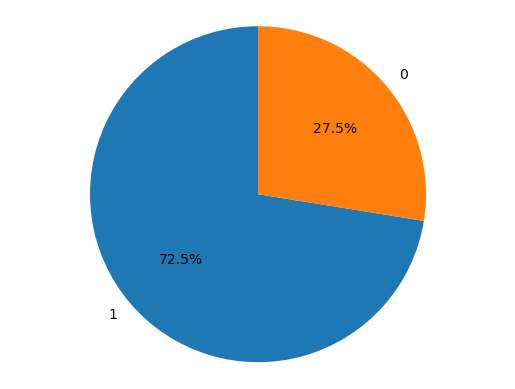

In [5]:
# plot the datset in %

# define the the Pie chart
labels = dataset[1].value_counts().index.tolist()
sizes = dataset[1].value_counts().values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [6]:
# train the dataset

X = dataset[0]
y = dataset[1]

In [7]:
# Split the dataset into training (80%) and testing sets (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Vectorize the text data using TF-IDF

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
# Train a logistic regression model

model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [10]:
# Make predictions on the test set

y_pred = model.predict(X_test_vec)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8252427184466019

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        27
           1       0.81      1.00      0.89        76

    accuracy                           0.83       103
   macro avg       0.90      0.67      0.70       103
weighted avg       0.86      0.83      0.79       103



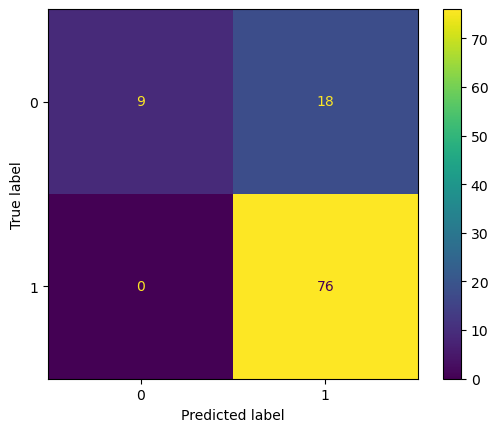


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        27
           1       0.81      1.00      0.89        76

    accuracy                           0.83       103
   macro avg       0.90      0.67      0.70       103
weighted avg       0.86      0.83      0.79       103



In [12]:
# Summary the result in matrix report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

print("\nClassification Report:\n", report)

In [13]:
# Write a new review text to rest the result

# New review text
new_review = ["the school is great"]

# Vectorize the new review using the fitted vectorizer
new_review_vec = vectorizer.transform(new_review)

# Predict the sentiment of the new review
prediction = model.predict(new_review_vec)

print("Predicted Sentiment:", prediction[0])


Predicted Sentiment: 1


In [14]:
# Write a new review text to rest the result

# New review text
new_review = ["the school is bad"]

# Vectorize the new review using the fitted vectorizer
new_review_vec = vectorizer.transform(new_review)

# Predict the sentiment of the new review
prediction = model.predict(new_review_vec)

print("Predicted Sentiment:", prediction[0])

Predicted Sentiment: 1
